In [ ]:
!nvidia-smi

Mon Jul 26 05:45:15 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
from sklearn.model_selection import train_test_split
import keras
from keras import Sequential
from keras.applications import vgg16
from keras.layers import Dense
from keras.preprocessing import image

In [ ]:
brain_df = pd.read_csv('/content/drive/MyDrive/brain tumor/Brain Tumor.csv',usecols=[0,1])
brain_df.head()

,Image,Class
0,Image1,0
1,Image2,0
2,Image3,1
3,Image4,1
4,Image5,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


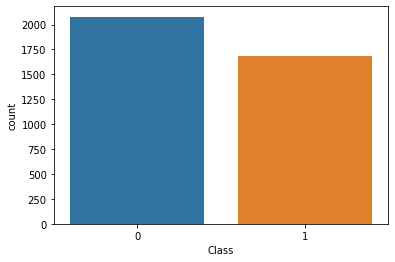

In [ ]:
sns.countplot(brain_df['Class'])

In [ ]:
path_list = []
base_path = '/content/drive/MyDrive/brain tumor/Brain Tumor/Brain Tumor'
for entry in os.listdir(base_path):
    path_list.append( os.path.join(base_path,entry))

In [ ]:
pathes_dict={os.path.splitext(os.path.basename(x))[0]: x for x in path_list}
brain_df['pathes'] = brain_df['Image'].map(pathes_dict.get)

In [ ]:
brain_df.head()

,Image,Class,pathes
0,Image1,0,/content/drive/MyDrive/brain tumor/Brain Tumor...
1,Image2,0,/content/drive/MyDrive/brain tumor/Brain Tumor...
2,Image3,1,/content/drive/MyDrive/brain tumor/Brain Tumor...
3,Image4,1,/content/drive/MyDrive/brain tumor/Brain Tumor...
4,Image5,0,/content/drive/MyDrive/brain tumor/Brain Tumor...


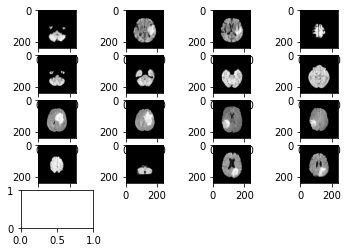

In [ ]:
for x in range (0 ,17):
    img = imread(brain_df['pathes'][x])
    plt.imshow(img)
    plt.subplot(5,4,x+1)

In [ ]:
from PIL.Image import open
brain_df['pixels']=brain_df['pathes'].map(lambda x:  np.asarray(open(x).resize((224,224))))

0       /content/drive/MyDrive/brain tumor/Brain Tumor...
1       /content/drive/MyDrive/brain tumor/Brain Tumor...
2       /content/drive/MyDrive/brain tumor/Brain Tumor...
3       /content/drive/MyDrive/brain tumor/Brain Tumor...
4       /content/drive/MyDrive/brain tumor/Brain Tumor...
                              ...                        
3757    /content/drive/MyDrive/brain tumor/Brain Tumor...
3758    /content/drive/MyDrive/brain tumor/Brain Tumor...
3759    /content/drive/MyDrive/brain tumor/Brain Tumor...
3760    /content/drive/MyDrive/brain tumor/Brain Tumor...
3761    /content/drive/MyDrive/brain tumor/Brain Tumor...
Name: pathes, Length: 3762, dtype: object

In [ ]:
brain_df.head()

,Image,Class,pathes,pixels
0,Image1,0,/content/drive/MyDrive/brain tumor/Brain Tumor...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,Image2,0,/content/drive/MyDrive/brain tumor/Brain Tumor...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,Image3,1,/content/drive/MyDrive/brain tumor/Brain Tumor...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,Image4,1,/content/drive/MyDrive/brain tumor/Brain Tumor...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,Image5,0,/content/drive/MyDrive/brain tumor/Brain Tumor...,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [ ]:
image_list = []
for i in range(0,len(brain_df)):
    # load image
    brain_img = brain_df['pixels'][i].astype(np.float32)
    img_array = image.img_to_array(brain_img)
     # append to list of all images
    image_list.append(keras.applications.vgg16.preprocess_input(img_array))
    
# convert image list to single array
# Our feature
X = np.array(image_list)

# print shape of X
print(X.shape)

(3762, 224, 224, 3)


In [ ]:
y = np.array(brain_df.Class)

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y
                                                 ,test_size=0.2
                                                ,random_state=0)


print('The shape of the X_train :'+' '+str(X_train.shape))
print('The size of the X_train :'+' '+str(X_train.shape[0]))
print('The shape of the X_test :'+' '+str(X_test.shape))
print('The size of the X_test:'+' '+str(X_test.shape[0]))

The shape of the X_train : (3009, 224, 224, 3)
The size of the X_train : 3009
The shape of the X_test : (753, 224, 224, 3)
The size of the X_test: 753


In [ ]:
num_classes = 1
model = Sequential()
model.add(vgg16.VGG16(input_shape=(224, 224, 3),weights="imagenet"
                             ,include_top=False))
model.add(keras.layers.GlobalAveragePooling2D())
model.add( Dense(num_classes, activation='sigmoid',name='preds'))
model.layers[0].trainable= False
# show model summary
model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
preds (Dense)                (None, 1)                 513       
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(
    # set the loss as binary_crossentropy
    loss=keras.losses.binary_crossentropy,
    # set the optimizer as stochastic gradient descent
    optimizer=keras.optimizers.SGD(lr=0.001),
    # set the metric as accuracy
    metrics=['accuracy']
)


# mock-train the model 
history=model.fit(
    X_train[:,:,:,:],
    y_train[:],
    epochs=200,
    verbose=2,
    validation_data=(X_test[:,:,:,:], y_test[:])
)
model.save("vgg_model_brain.h5")
print("Saved model to disk")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
95/95 - 69s - loss: 0.7071 - accuracy: 0.6776 - val_loss: 0.9474 - val_accuracy: 0.6082
Epoch 2/200
95/95 - 13s - loss: 0.5558 - accuracy: 0.7448 - val_loss: 0.5183 - val_accuracy: 0.7530
Epoch 3/200
95/95 - 13s - loss: 0.4935 - accuracy: 0.7723 - val_loss: 0.5101 - val_accuracy: 0.7649
Epoch 4/200
95/95 - 14s - loss: 0.4582 - accuracy: 0.7920 - val_loss: 0.4890 - val_accuracy: 0.7862
Epoch 5/200
95/95 - 14s - loss: 0.4302 - accuracy: 0.8116 - val_loss: 0.4522 - val_accuracy: 0.8074
Epoch 6/200
95/95 - 14s - loss: 0.4087 - accuracy: 0.8185 - val_loss: 0.4188 - val_accuracy: 0.8021
Epoch 7/200
95/95 - 14s - loss: 0.3913 - accuracy: 0.8285 - val_loss: 0.5634 - val_accuracy: 0.7676
Epoch 8/200
95/95 - 14s - loss: 0.3810 - accuracy: 0.8312 - val_loss: 0.4002 - val_accuracy: 0.8088
Epoch 9/200
95/95 - 14s - loss: 0.3668 - accuracy: 0.8398 - val_loss: 0.5260 - val_accuracy: 0.7649
Epoch 10/200
95/95 - 14s - loss: 0.3601 - accuracy: 0.8475 - val_loss: 0.3722 - val_accuracy: 0.8300

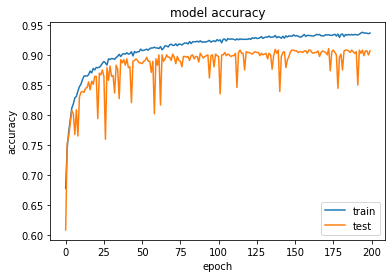

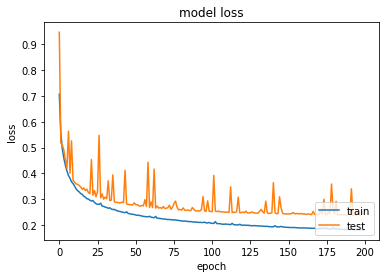

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [ ]:
pretrained_cnn = keras.models.load_model('./vgg_model_brain.h5')

# evaluate model on holdout set
eval_score = pretrained_cnn.evaluate(X_test,y_test)
# print loss score
print('Eval loss:',eval_score[0])
# print accuracy score
print('Eval accuracy:',eval_score[1] )

24/24 [==============================] - 3s 114ms/step - loss: 0.2452 - accuracy: 0.9070
Eval loss: 0.24524126946926117
Eval accuracy: 0.9070385098457336


In [ ]:
y_pred = pretrained_cnn.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
target_classes = ['No Tumor','Tumor']
classification_report(y_test , y_pred , output_dict = True
                      , target_names=target_classes)

{'No Tumor': {'f1-score': 0.916267942583732,
  'precision': 0.8784403669724771,
  'recall': 0.9575,
  'support': 400},
 'Tumor': {'f1-score': 0.8955223880597015,
  'precision': 0.9463722397476341,
  'recall': 0.8498583569405099,
  'support': 353},
 'accuracy': 0.9070385126162018,
 'macro avg': {'f1-score': 0.9058951653217168,
  'precision': 0.9124063033600556,
  'recall': 0.9036791784702549,
  'support': 753},
 'weighted avg': {'f1-score': 0.9065426029463047,
  'precision': 0.9102862515536594,
  'recall': 0.9070385126162018,
  'support': 753}}

In [ ]:
confusion_matrix(y_test , y_pred )

array([[383,  17],
       [ 53, 300]])